In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
from sklearn.impute import KNNImputer


In [3]:
data =pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [4]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
data[data['Review Text'].isnull()].count()


Unnamed: 0                 845
Clothing ID                845
Age                        845
Title                        1
Review Text                  0
Rating                     845
Recommended IND            845
Positive Feedback Count    845
Division Name              844
Department Name            844
Class Name                 844
dtype: int64

In [8]:
data[data['Rating'].isnull()]


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [9]:
data['Rating'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 23486 entries, 0 to 23485
Series name: Rating
Non-Null Count  Dtype
--------------  -----
23486 non-null  int64
dtypes: int64(1)
memory usage: 183.6 KB


In [10]:
data[data['Title'].isnull()].count()


Unnamed: 0                 3810
Clothing ID                3810
Age                        3810
Title                         0
Review Text                2966
Rating                     3810
Recommended IND            3810
Positive Feedback Count    3810
Division Name              3809
Department Name            3809
Class Name                 3809
dtype: int64

In [11]:
# replacing the null values in rating with neutral response
filtered_data = data[data["Rating"]==2]

In [12]:
filtered_data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
22,22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
26,26,949,33,Huge disappointment,I have been waiting for this sweater coat to s...,2,0,0,General,Tops,Sweaters
33,33,949,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,0,General,Tops,Sweaters
56,56,368,33,NaN,I am pregnant and i thought this would be a gr...,2,0,3,Initmates,Intimate,Intimates
...,...,...,...,...,...,...,...,...,...,...,...
23391,23391,884,45,Tight in all the wrong places...,"The model looks awesome in this cute top, but ...",2,0,3,General Petite,Tops,Knits
23405,23405,931,47,"Very big, scratchy","I'm petite, and i knew buying this that it wou...",2,0,0,General,Tops,Sweaters
23424,23424,854,58,Extremely sheer!,Before i ordered this i noted the other review...,2,0,0,General Petite,Tops,Knits
23427,23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0,65,General Petite,Tops,Knits


In [13]:
data["Rating"].isnull().describe()


count     23486
unique        1
top       False
freq      23486
Name: Rating, dtype: object

In [14]:
rep_nan = {
    1: 'Poor Unflattering Itchy tags Bad worst sad Disappointed Ugly Terrible',
    2: 'Not',
    3: 'Fair flaws cheap Boring Awkward',
    4: 'perfect pretty ',
    5: 'Flattering Love cute fun perfect Versatile great beautiful Compliments Gorgeous'
}

In [15]:
data.loc[data['Title'].isnull(), 'Title'] = data[data['Title'].isnull()]['Rating'].replace(rep_nan)
data.loc[data['Review Text'].isnull(), 'Review Text'] = data[data['Review Text'].isnull()]['Rating'].replace(rep_nan)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,perfect pretty,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Flattering Love cute fun perfect Versatile gre...,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
df1=data[['Title','Review Text','Rating']]
df1.head()

,Title,Review Text,Rating
0,perfect pretty,Absolutely wonderful - silky and sexy and comf...,4
1,Flattering Love cute fun perfect Versatile gre...,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5


In [17]:
df1['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [18]:
df1[df1['Title']=='Not']


,Title,Review Text,Rating
56,Not,I am pregnant and i thought this would be a gr...,2
104,Not,"Runs big and looked unflattering. i am petite,...",2
286,Not,Like the other reviewer said this top is extre...,2
368,Not,I love maeve and was so excited for this top w...,2
403,Not,I got this top to wear with shorts as the colo...,2
...,...,...,...
22958,Not,I bought the red motiff in my usual size of xx...,2
23028,Not,I was expecting a nice golden yellow color but...,2
23130,Not,There isn't a whole lot that i did like about ...,2
23196,Not,"I loved how this looked on the model, however,...",2


In [19]:
y=df1.iloc[:,2:3].values


In [20]:
y

array([[4],
       [5],
       [3],
       ...,
       [3],
       [3],
       [5]], dtype=int64)

In [21]:
X=df1.iloc[:,0:2].values


In [22]:
X

array([['perfect pretty ',
        'Absolutely wonderful - silky and sexy and comfortable'],
       ['Flattering Love cute fun perfect Versatile great beautiful Compliments Gorgeous',
        'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'],
       ['Some major design flaws',
        'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net

In [23]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import string
import pickle
PUNCTUATION = set(string.punctuation)  # Predefined set of punctuation
STOPWORDS = set(stopwords.words('english')) # Predefined set of stop words
STEMMER = PorterStemmer()

def tokenize_X(text):
    tokens = word_tokenize(str(text)) # tokenization
    #print(tokens)

    lowercased = [t.lower() for t in tokens] # make it lower case
    #print(lowercased)
    no_punctuation = []
    for word in lowercased:
        punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION]) # Remove punctuation
        no_punctuation.append(punct_removed)

    no_stopwords = [w for w in no_punctuation if not w in STOPWORDS] # Remove stop words
    #print('\n')
    #print(no_stopwords)

    no_numbers=[w for w in no_stopwords if not w.isdigit()] # Remove the Numbers/Digits
    #print(no_numbers)
    #stemmed = [STEMMER.stem(w) for w in no_numbers]
    return [w for w in no_numbers if w]

tokenized_word_X = [tokenize_X(text) for text in X]

In [25]:
tokenized_word_X

[['perfect',
  'pretty',
  'absolutely',
  'wonderful',
  'silky',
  'sexy',
  'comfortable'],
 ['flattering',
  'love',
  'cute',
  'fun',
  'perfect',
  'versatile',
  'great',
  'beautiful',
  'compliments',
  'gorgeous',
  'love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'glad',
  'bc',
  'never',
  'would',
  'ordered',
  'online',
  'bc',
  'petite',
  'bought',
  'petite',
  'love',
  'length',
  'hits',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['major',
  'design',
  'flaws',
  'high',
  'hopes',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap'

In [26]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himanshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
Data=[]
for i in range(len(tokenized_word_X)):
    Data.append(TreebankWordDetokenizer().detokenize(tokenized_word_X[i]))


In [28]:
Data

['perfect pretty absolutely wonderful silky sexy comfortable',
 'flattering love cute fun perfect versatile great beautiful compliments gorgeous love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite',
 'major design flaws high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c',
 'favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments',
 'flattering shirt shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt',
 'petite love tracy reese dresses one petite feet tall usually wear 0p brand dress pretty package lot dres

In [29]:
y

array([[4],
       [5],
       [3],
       ...,
       [3],
       [3],
       [5]], dtype=int64)

In [30]:
#Data[0]
B, T = np.unique(y, return_inverse=True)   # get the all unique values for Ratings


In [31]:
B

array([1, 2, 3, 4, 5], dtype=int64)

In [32]:
len(B)

5

In [33]:
T

array([3, 4, 2, ..., 2, 2, 4], dtype=int64)

In [34]:
len(T)

23486

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Data,T, test_size=0.2, random_state=42)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer #simply import CountVectorizer
count_vect = CountVectorizer() #instantiate it's object
X_train_counts = count_vect.fit_transform(X_train) #builds a term-document matrix ands return it
print (X_train_counts.shape)

(18788, 17425)


# MultinomialNB

In [37]:
from sklearn.naive_bayes import MultinomialNB #importing the Sklearn's NB Fucntionality
clf = MultinomialNB() #simply instantiate a Multinomial Naive Bayes object
clf.fit(X_train_counts, y_train)  #calling the fit method trains it
print ("Training Completed")

Training Completed


In [38]:
X_test_counts = count_vect.transform(X_test) #builds a term-document matrix ands return it
np.shape(X_test_counts)


(4698, 17425)

In [39]:
y_pred=clf.predict(X_test_counts)

In [40]:
cm=confusion_matrix(y_test, y_pred)


<AxesSubplot:>

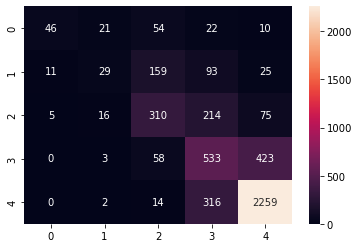

In [41]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.30      0.43       153
           1       0.41      0.09      0.15       317
           2       0.52      0.50      0.51       620
           3       0.45      0.52      0.49      1017
           4       0.81      0.87      0.84      2591

    accuracy                           0.68      4698
   macro avg       0.59      0.46      0.48      4698
weighted avg       0.66      0.68      0.66      4698



# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier()


In [45]:
rfc.fit(X_train_counts, y_train)

RandomForestClassifier()

In [46]:
y_pred=rfc.predict(X_test_counts)


In [47]:
accuracy_score(y_test,y_pred)

0.6326096211153682

In [48]:
cm=confusion_matrix(y_test, y_pred)


<AxesSubplot:>

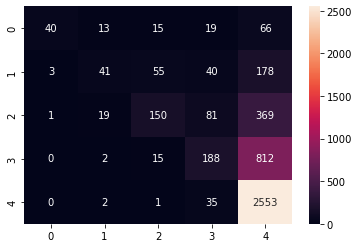

In [49]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [50]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.26      0.41       153
           1       0.53      0.13      0.21       317
           2       0.64      0.24      0.35       620
           3       0.52      0.18      0.27      1017
           4       0.64      0.99      0.78      2591

    accuracy                           0.63      4698
   macro avg       0.65      0.36      0.40      4698
weighted avg       0.62      0.63      0.56      4698



# XGBClassifier

In [51]:
import xgboost as xgb

In [52]:
xgb_i=xgb.XGBClassifier()

In [53]:
xgb_i.fit(X_train_counts, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [54]:
y_pred=xgb_i.predict(X_test_counts)


In [55]:
accuracy_score(y_test,y_pred)

0.6698595146871009

In [56]:
cm=confusion_matrix(y_test, y_pred)


<AxesSubplot:>

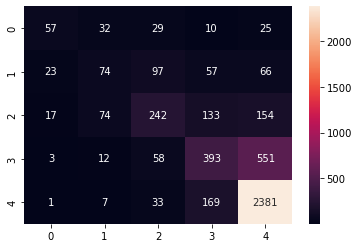

In [57]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [58]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.37      0.45       153
           1       0.37      0.23      0.29       317
           2       0.53      0.39      0.45       620
           3       0.52      0.39      0.44      1017
           4       0.75      0.92      0.83      2591

    accuracy                           0.67      4698
   macro avg       0.55      0.46      0.49      4698
weighted avg       0.64      0.67      0.64      4698



# KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knc=KNeighborsClassifier()


In [61]:
knc.fit(X_train_counts, y_train)

KNeighborsClassifier()

In [62]:
y_pred=knc.predict(X_test_counts)


In [63]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Accuracy: 49.62%


In [64]:
cm=confusion_matrix(y_test, y_pred)


<AxesSubplot:>

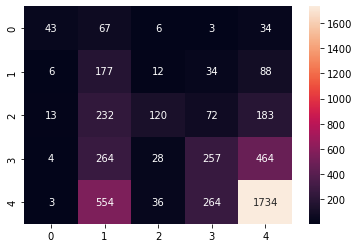

In [65]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [66]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.28      0.39       153
           1       0.14      0.56      0.22       317
           2       0.59      0.19      0.29       620
           3       0.41      0.25      0.31      1017
           4       0.69      0.67      0.68      2591

    accuracy                           0.50      4698
   macro avg       0.49      0.39      0.38      4698
weighted avg       0.58      0.50      0.51      4698



# DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc=DecisionTreeClassifier()


In [69]:
dtc.fit(X_train_counts, y_train)

DecisionTreeClassifier()

In [70]:
y_pred=dtc.predict(X_test_counts)


In [71]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Accuracy: 57.68%


In [72]:
cm=confusion_matrix(y_test, y_pred)


<AxesSubplot:>

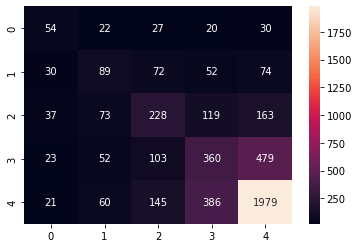

In [73]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [74]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.35      0.34       153
           1       0.30      0.28      0.29       317
           2       0.40      0.37      0.38       620
           3       0.38      0.35      0.37      1017
           4       0.73      0.76      0.74      2591

    accuracy                           0.58      4698
   macro avg       0.43      0.42      0.42      4698
weighted avg       0.57      0.58      0.57      4698

